In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("../data/sensor_data_kz_realistic.csv")
df.head()


,уақыт,өңір,өңір_код,температура,тұздылық,pH,кіру_қысымы,су_деңгейі,шығыс_қысымы,аномалия,әдіс,процесс_сатысы,қатты_су,жоғары_қысым_талап
0,2025-04-01 00:00,Қызылорда,1,28.948417,6926.586800,7.781311,2.557258,26.985564,16.569438,0,нанофильтрация,алдын ала сүзу,1,1
1,2025-04-01 00:30,Алматы,2,15.603528,3090.845851,7.180943,4.860768,86.934395,5.760595,0,мембраналық сүзу,алдын ала сүзу,0,1
2,2025-04-01 01:00,Қостанай,3,6.442318,1562.035381,7.699515,3.690386,24.585279,1.531515,0,мембраналық сүзу,алдын ала сүзу,0,0
3,2025-04-01 01:30,Қостанай,3,2.740655,1584.950677,6.613559,5.004626,25.101722,2.058593,0,мембраналық сүзу,алдын ала сүзу,0,0
4,2025-04-01 02:00,Қостанай,3,7.462586,1303.943051,7.429408,3.773172,22.884905,1.171907,0,мембраналық сүзу,алдын ала сүзу,0,0


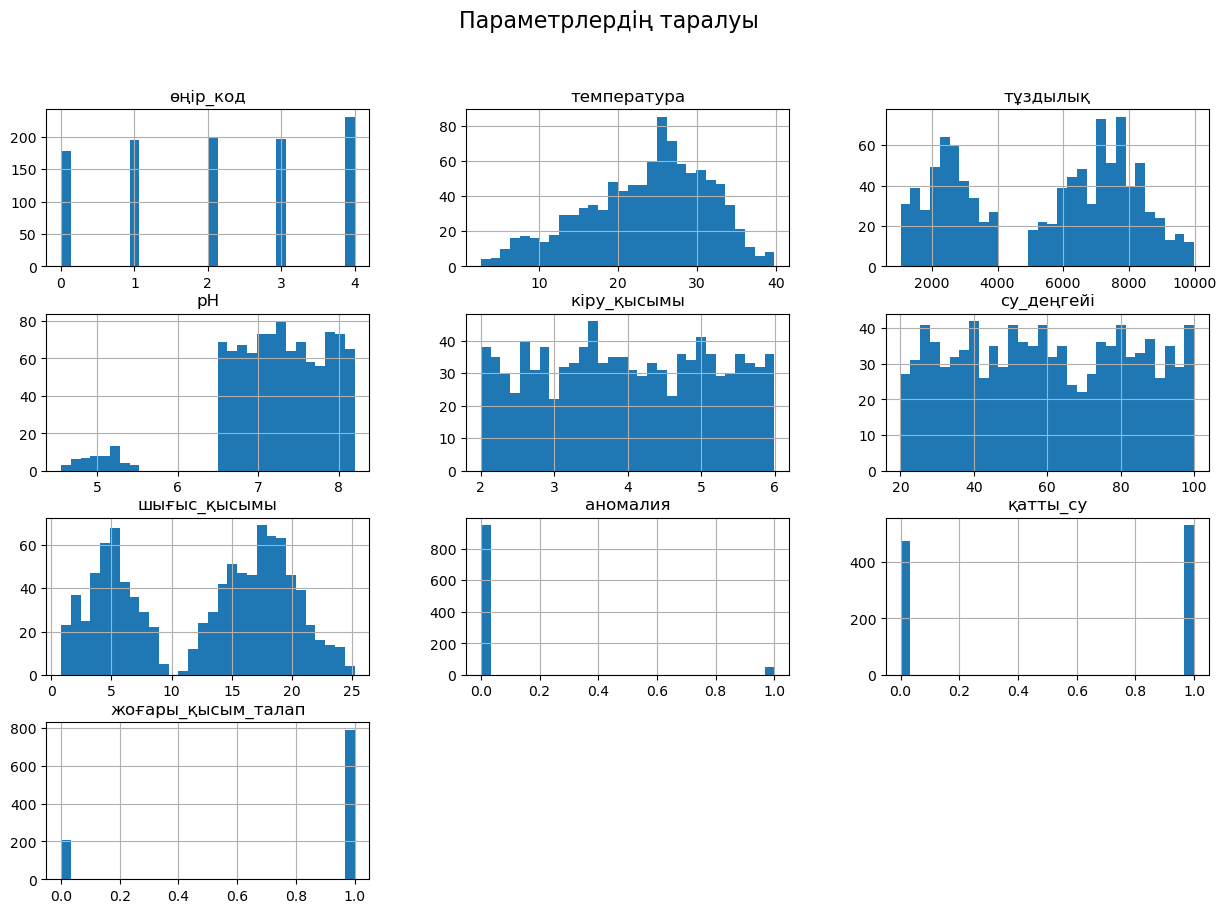

In [2]:
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Параметрлердің таралуы", fontsize=16)
plt.show()


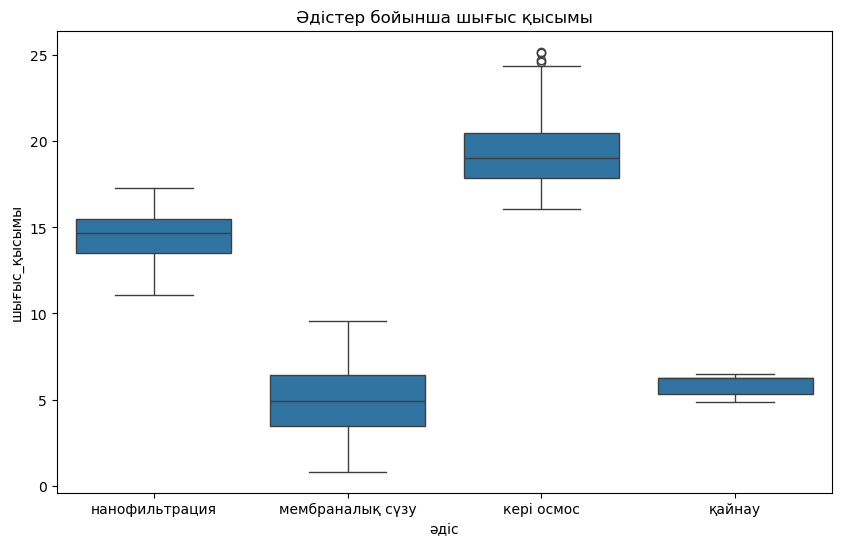

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="әдіс", y="шығыс_қысымы", data=df)
plt.title("Әдістер бойынша шығыс қысымы")
plt.show()


Аномалиялық жазбалар саны: 52


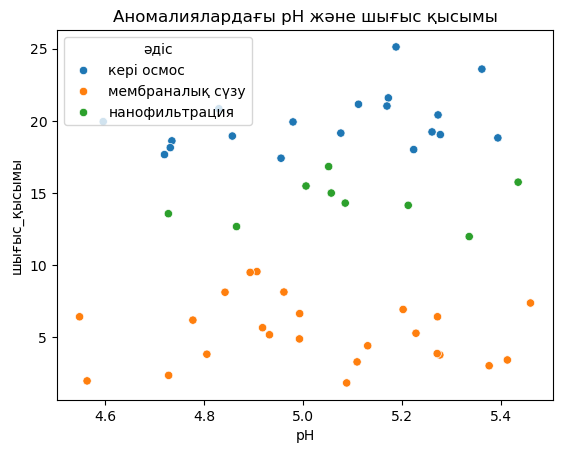

In [4]:
anom_df = df[df["аномалия"] == 1]
print(f"Аномалиялық жазбалар саны: {len(anom_df)}")

sns.scatterplot(data=anom_df, x="pH", y="шығыс_қысымы", hue="әдіс")
plt.title("Аномалиялардағы pH және шығыс қысымы")
plt.show()


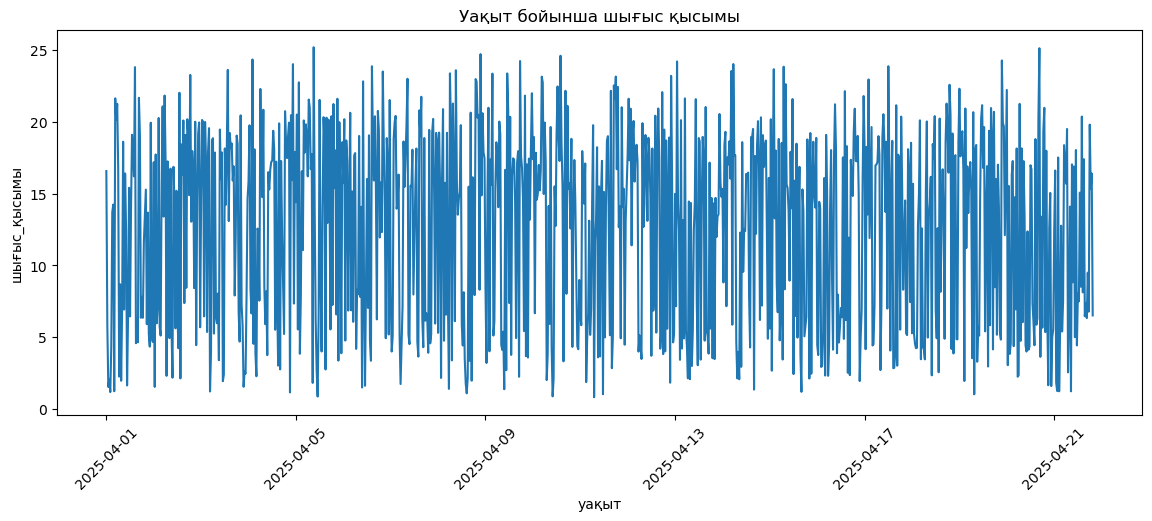

In [5]:
df["уақыт"] = pd.to_datetime(df["уақыт"])

plt.figure(figsize=(14, 5))
sns.lineplot(x="уақыт", y="шығыс_қысымы", data=df)
plt.title("Уақыт бойынша шығыс қысымы")
plt.xticks(rotation=45)
plt.show()


In [6]:
pivot = df.pivot_table(index="әдіс", values="қатты_су", aggfunc="mean")
print("Әр әдіске шаққанда қатты судың үлесі:")
print(pivot)

pivot2 = df.pivot_table(index="әдіс", values="жоғары_қысым_талап", aggfunc="mean")
print("Әр әдісте жоғары қысым қажет болған жағдай:")
print(pivot2)


Әр әдіске шаққанда қатты судың үлесі:
                  қатты_су
әдіс                      
кері осмос        1.000000
мембраналық сүзу  0.000000
нанофильтрация    0.656109
қайнау            0.000000
Әр әдісте жоғары қысым қажет болған жағдай:
                  жоғары_қысым_талап
әдіс                                
кері осмос                  1.000000
мембраналық сүзу            0.468031
нанофильтрация              1.000000
қайнау                      0.800000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Графиктер стилі
sns.set(style="whitegrid")

# Деректерді жүктеу
df = pd.read_csv("../data/sensor_data_kz_realistic.csv")
df["уақыт"] = pd.to_datetime(df["уақыт"])
df.head()


,уақыт,өңір,өңір_код,температура,тұздылық,pH,кіру_қысымы,су_деңгейі,шығыс_қысымы,аномалия,әдіс,процесс_сатысы,қатты_су,жоғары_қысым_талап
0,2025-04-01 00:00:00,Қызылорда,1,28.948417,6926.586800,7.781311,2.557258,26.985564,16.569438,0,нанофильтрация,алдын ала сүзу,1,1
1,2025-04-01 00:30:00,Алматы,2,15.603528,3090.845851,7.180943,4.860768,86.934395,5.760595,0,мембраналық сүзу,алдын ала сүзу,0,1
2,2025-04-01 01:00:00,Қостанай,3,6.442318,1562.035381,7.699515,3.690386,24.585279,1.531515,0,мембраналық сүзу,алдын ала сүзу,0,0
3,2025-04-01 01:30:00,Қостанай,3,2.740655,1584.950677,6.613559,5.004626,25.101722,2.058593,0,мембраналық сүзу,алдын ала сүзу,0,0
4,2025-04-01 02:00:00,Қостанай,3,7.462586,1303.943051,7.429408,3.773172,22.884905,1.171907,0,мембраналық сүзу,алдын ала сүзу,0,0


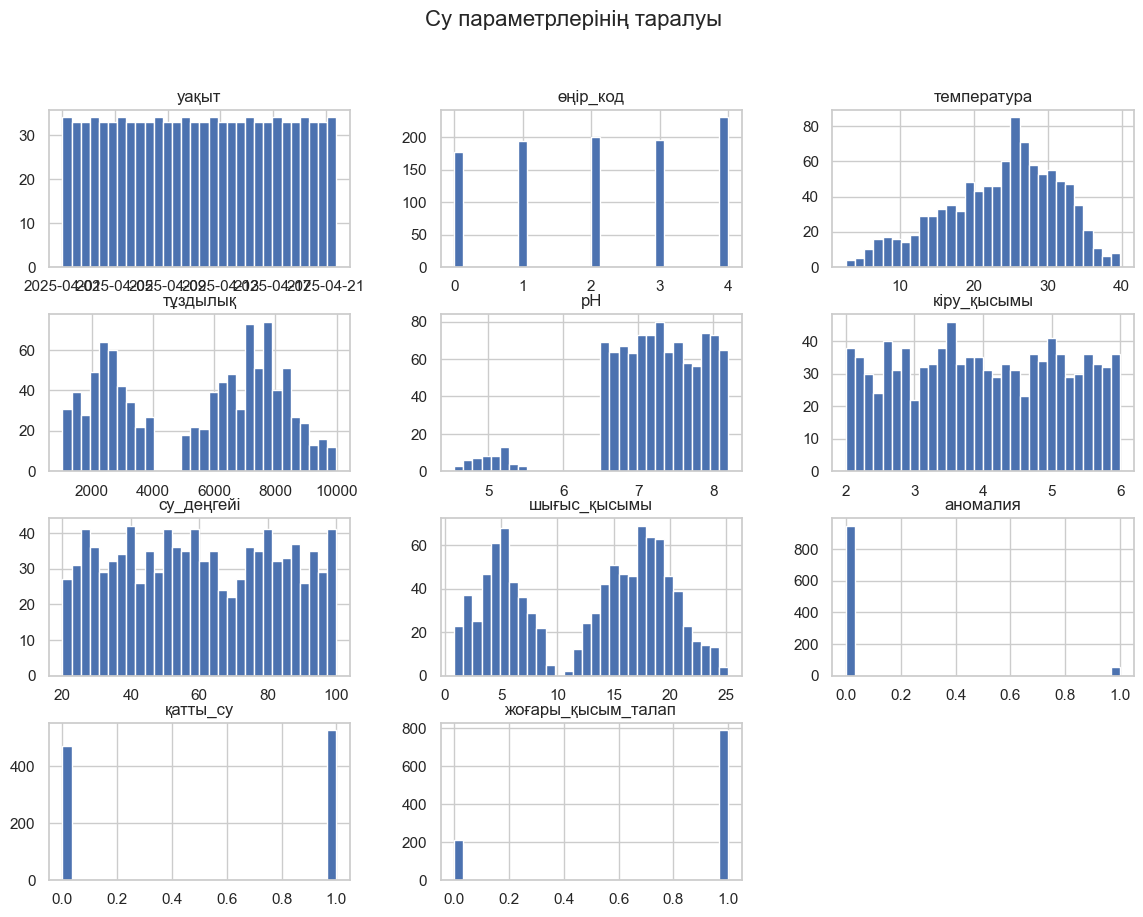

In [8]:
df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Су параметрлерінің таралуы", fontsize=16)
plt.show()


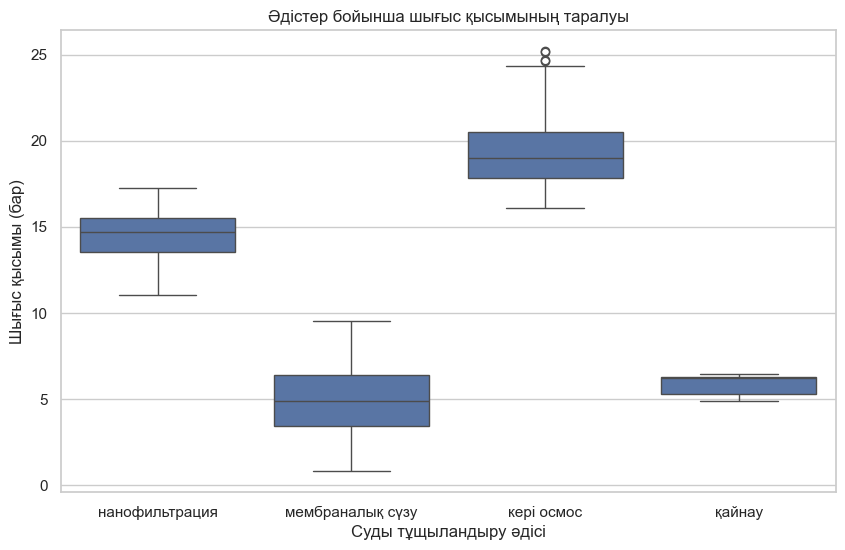

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="әдіс", y="шығыс_қысымы", data=df)
plt.title("Әдістер бойынша шығыс қысымының таралуы")
plt.xlabel("Суды тұщыландыру әдісі")
plt.ylabel("Шығыс қысымы (бар)")
plt.show()


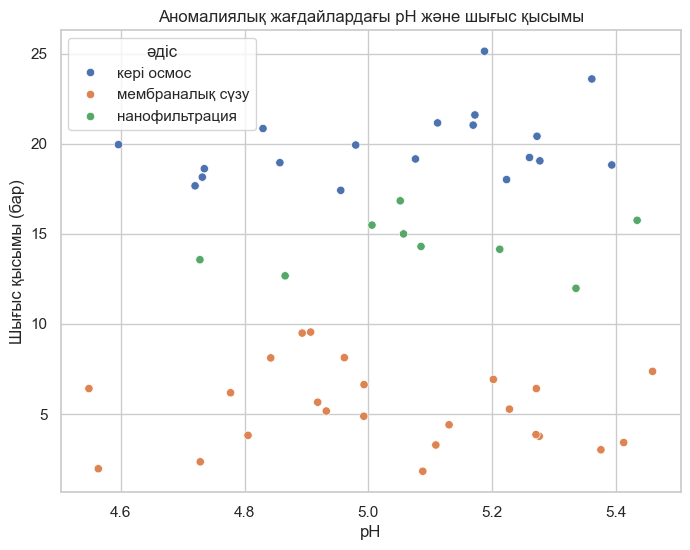

In [10]:
anom_df = df[df["аномалия"] == 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=anom_df, x="pH", y="шығыс_қысымы", hue="әдіс")
plt.title("Аномалиялық жағдайлардағы pH және шығыс қысымы")
plt.xlabel("pH")
plt.ylabel("Шығыс қысымы (бар)")
plt.show()


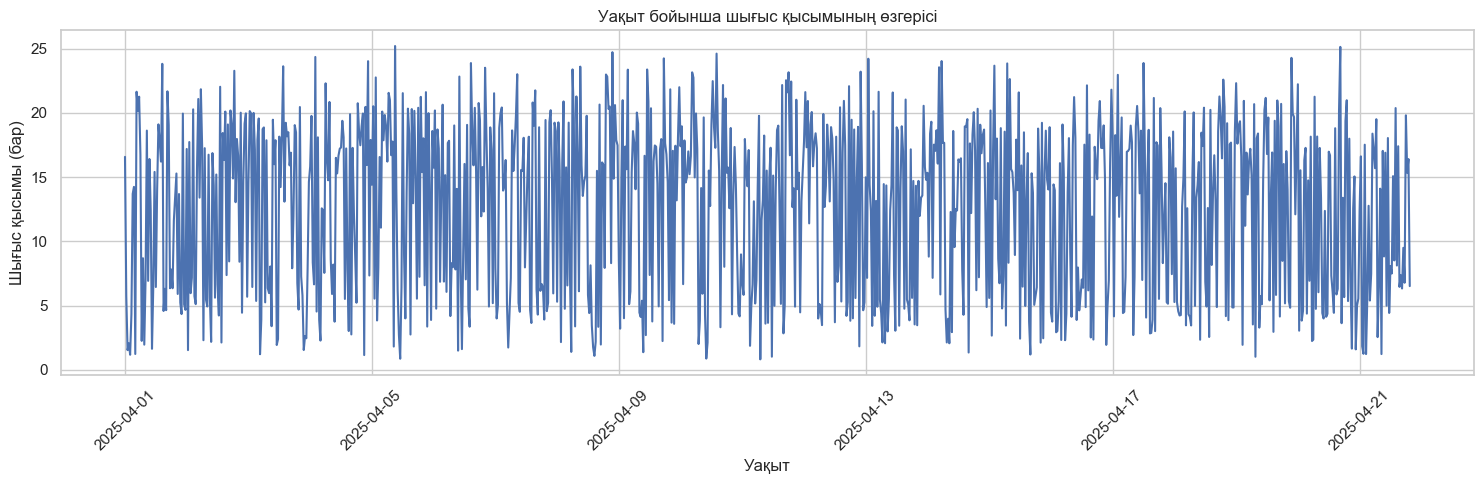

In [11]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="уақыт", y="шығыс_қысымы")
plt.title("Уақыт бойынша шығыс қысымының өзгерісі")
plt.xlabel("Уақыт")
plt.ylabel("Шығыс қысымы (бар)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

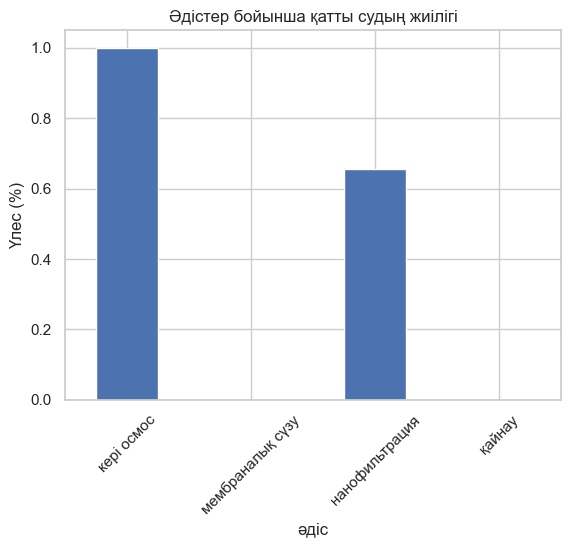

In [12]:
pivot = df.pivot_table(index="әдіс", values="қатты_су", aggfunc="mean")

plt.figure(figsize=(8, 5))
pivot.plot(kind="bar", legend=False)
plt.title("Әдістер бойынша қатты судың жиілігі")
plt.ylabel("Үлес (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Figure size 800x500 with 0 Axes>

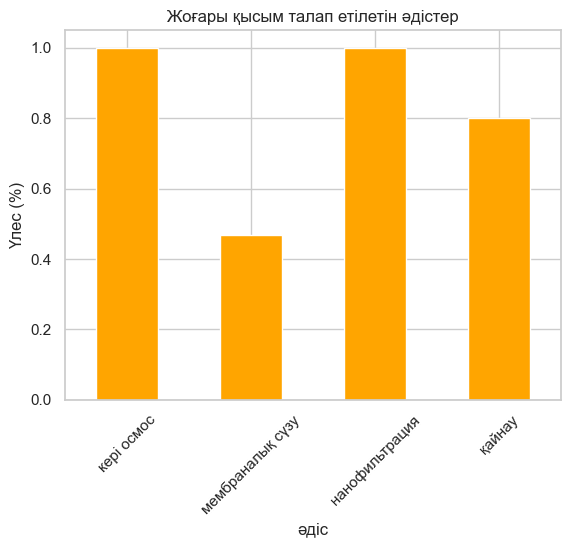

In [13]:
pivot2 = df.pivot_table(index="әдіс", values="жоғары_қысым_талап", aggfunc="mean")

plt.figure(figsize=(8, 5))
pivot2.plot(kind="bar", color="orange", legend=False)
plt.title("Жоғары қысым талап етілетін әдістер")
plt.ylabel("Үлес (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
